# Importando bibliotecas

In [137]:
import pandas as pd
import numpy as np

# Carregando dados

In [138]:
pd.set_option('display.max_columns', None)

In [139]:
dados_original = pd.read_excel('dados_possiveis_usuarios_c_label_2_clusters.xlsx', sheet_name = 'possiveis_assinantes')
dados_original.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
2,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
3,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,8,2024-08-16 12:20:10,2024-08-16 12:23:20,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


In [140]:
dados_original.loc[dados_original['Em qual faixa etária você se encaixa?'] == 'Entre 19 e 24 anos', 'Em qual faixa etária você se encaixa?'] = 'Entre 18 e 24 anos'

dados_original.loc[dados_original['Em qual faixa etária você se encaixa?'] == 'Entre 46 a 59 anos', 'Em qual faixa etária você se encaixa?'] = 'Entre 46 e 59 anos'

dados_original.loc[dados_original['Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.'] == 'Sem um guia/planejamento para ver as obras', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.'] = 'Sem um guia/planejamento para ver as obras.'

In [141]:
dados = dados_original.copy()

# Tratando dataframe

## Escolhendo colunas

In [142]:
dados.columns

Index(['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Em qual faixa etária você se encaixa?',
       'Com qual gênero você se identifica?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
   

In [143]:
dados.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome', 'Hora da última modificação'], inplace=True)
dados.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
2,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
3,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


## Dados nulos e outliers

In [144]:
for i in dados:
    print(i)
    print(dados[i].unique())
    print()
    print("=" * 30)

# 'Entre 19 e 24 anos' -> 'Entre 18 e 24 anos'
# 'Entre 46 a 59 anos' -> 'Entre 46 e 59 anos'
# 'Sem um guia/planejamento para ver as obras' -> 'Sem um guia/planejamento para ver as obras.'

Em qual faixa etária você se encaixa?
['Menos de 18 anos' 'Entre 46 e 59 anos' 'Entre 18 e 24 anos' '60+ anos'
 'Entre 36 e 45 anos' 'Entre 25 e 35 anos']

Com qual gênero você se identifica?
['Masculino' 'Feminino' 'Outro']

Qual seu nível de formação atual?
['Cursando ensino médio' 'Ensino superior concluído'
 'Cursando ensino superior' 'Cursando ensino fundamental'
 'Ensino fundamental incompleto' 'Ensino superior incompleto/não iniciado'
 'Ensino médio incompleto']

Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
['Classes D/E: até R$ 2,9 mil' 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil'
 'Classe B: entre R$ 7,1 mil e R$ 22 mil' 'Classe A: superior a R$ 22 mil']

Há quanto tempo você se interessa por arte?
['Menos de 2 anos' 'De 2 a 4 anos' 'Estou iniciando agora'
 'Há mais de 10 anos' 'De 5 a 9 anos']

Qual das opções de arte abaixo você mais gosta?
['Fotografia' 'Escultura' 'Pintur

In [145]:
# dados.fillna("Sem registro", inplace=True)

In [146]:
df = dados.copy()

## Transformando em numerico

In [147]:
df.fillna("#", inplace=True)
df.loc[df['Há quanto tempo você se interessa por arte?'] == 'Não me interesso', 'Há quanto tempo você se interessa por arte?'] = '#'
for i in df:
    print(i)
    if df[i].dtype == object:
        dados_unique = df[i].unique()
        dados_unique.sort()
        mapeamento = {}
        for k, v in enumerate(dados_unique):
            mapeamento[v] = k

    df[i] = df[i].map(mapeamento)

Em qual faixa etária você se encaixa?
Com qual gênero você se identifica?
Qual seu nível de formação atual?
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Há quanto tempo você se interessa por arte?
Qual das opções de arte abaixo você mais gosta?
Com que frequência você vai aos museus?
Você já participou de algum curso ou atividade relacionada à arte?
Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Você já usou um aplicativo de um museu ou relacionado à arte?
O que mais te atrai em visitar museus ou exposições de arte?
Você sente falta de mais informações sobre as obras nos museus?
Você procura saber sobre essas informações faltantes?
De que forma você costuma buscar essas informações?
Você encontra o que precisa/esperava ao pesquisar?


In [148]:
df.head(10)

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,5,1,1,3,4,4,4,0,1,2,0,3,1,2,4,1
1,5,0,1,2,0,3,3,1,1,2,0,1,0,0,0,0
2,5,1,1,1,2,5,3,0,1,2,0,3,1,1,0,0
3,4,1,5,0,3,4,1,1,0,1,1,2,1,1,0,0
4,5,0,1,2,0,1,3,1,1,2,0,3,1,1,0,0
5,1,0,2,1,0,4,4,1,1,3,0,2,1,1,0,0
6,5,0,1,2,4,3,4,0,1,2,0,2,1,1,0,0
7,5,1,1,2,3,5,4,0,0,0,0,3,0,0,0,0
8,5,1,0,3,0,2,2,0,1,2,0,1,1,2,4,2
9,4,0,5,1,3,5,4,0,0,0,0,3,1,1,0,0


# Modelo não supervisionado cru

In [149]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 5, random_state=0, n_init="auto")

modelo.fit(df)

centers = modelo.cluster_centers_  

labels = modelo.labels_

print(labels)

[0 2 2 4 2 2 2 2 0 4 2 0 2 2 4 0 2 0 0 0 2 2 0 2 2 2 2 0 0 4 3 0 2 0 2 0 4
 3 2 2 3 2 3 2 4 0 4 2 3 1 0 2 2 2 2 0 1 2 2 2 1 3 2 0 2 2 3 2 0 2 2 3 3 0
 2 3 4 2 2 0 2 2 2 2 3 4 2 0 3 0 0 4 2 0 2 3 0 0 0 0 4 0 3 2 0 0 0 0 2 4 4
 3 3 4 1 3 3 3 0 4 3 0 3 3 1 4 3 4 3 3 3 4 4 1 3 1 4 4 4 3 4 4 0 2 4 3 4 3
 3 1 4 3 4 3 3 1 1 4 3]


In [150]:
dados['Cluster'] = labels

In [151]:
centers

array([[4.86111111e+00, 4.72222222e-01, 7.22222222e-01, 1.91666667e+00,
        2.16666667e+00, 3.44444444e+00, 3.66666667e+00, 6.11111111e-01,
        9.72222222e-01, 1.83333333e+00, 2.77777778e-01, 2.05555556e+00,
        1.00000000e+00, 2.00000000e+00, 4.38888889e+00, 1.66666667e+00],
       [1.90000000e+00, 5.00000000e-01, 4.70000000e+00, 1.40000000e+00,
        2.20000000e+00, 9.00000000e-01, 2.60000000e+00, 4.00000000e-01,
        1.00000000e+00, 1.60000000e+00, 2.00000000e-01, 1.90000000e+00,
        1.00000000e+00, 2.00000000e+00, 4.60000000e+00, 2.00000000e+00],
       [4.67346939e+00, 4.08163265e-01, 7.34693878e-01, 1.63265306e+00,
        1.30612245e+00, 3.67346939e+00, 2.75510204e+00, 5.10204082e-01,
        8.57142857e-01, 1.65306122e+00, 1.83673469e-01, 2.24489796e+00,
        6.12244898e-01, 6.73469388e-01, 8.16326531e-02, 6.12244898e-02],
       [2.22857143e+00, 3.42857143e-01, 4.80000000e+00, 1.31428571e+00,
        2.54285714e+00, 4.34285714e+00, 2.91428571e+00, 5.428

In [152]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from pandas.plotting import parallel_coordinates

# # Criar uma cópia dos dados para adicionar as informações de cluster
# dados_com_clusters = dados.copy()
# dados_com_clusters['Cluster'] = modelo.labels_

# # Plotagem de coordenadas paralelas
# plt.figure(figsize=(15, 8))
# parallel_coordinates(dados_com_clusters, class_column='Cluster', colormap='viridis')
# plt.title('Parallel Coordinates Plot para Clusters')
# plt.xlabel('Features')
# plt.ylabel('Valores')
# plt.grid(True)
# plt.show()

In [153]:
# import seaborn as sns

# # Adicionar coluna de cluster ao dataframe
# dados_com_clusters = dados.copy()
# dados_com_clusters['Cluster'] = modelo.labels_

# # Usando Seaborn para criar a matriz de dispersão
# sns.pairplot(dados_com_clusters, hue='Cluster', palette='viridis')
# plt.show()


## Visualizando as características de cada cluster

In [154]:
cluster_0 = dados.loc[dados['Cluster'] == 0]
cluster_1 = dados.loc[dados['Cluster'] == 1]
cluster_2 = dados.loc[dados['Cluster'] == 2]
cluster_3 = dados.loc[dados['Cluster'] == 3]
cluster_4 = dados.loc[dados['Cluster'] == 4]

### Analisando Cluster 0

In [155]:
cluster_0.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,0
8,Menos de 18 anos,Masculino,Cursando ensino fundamental,"Classes D/E: até R$ 2,9 mil",De 2 a 4 anos,Arte digital,Nunca,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,0
11,Menos de 18 anos,Feminino,Cursando ensino fundamental,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,0
15,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Menos de 2 anos,Fotografia,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em inteligências artificiais (ChatGPT, G...",Sim,0
17,Menos de 18 anos,Feminino,Ensino fundamental incompleto,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Sim,Sim,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,0


In [156]:
for i in cluster_0:
    print(cluster_0[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      34
Entre 18 e 24 anos     1
Entre 46 e 59 anos     1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     23
Masculino     9
Outro         4
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental      17
Cursando ensino médio            15
Ensino fundamental incompleto     3
Cursando ensino superior          1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    15
Classe B: entre R$ 7,1 mil e R$ 22 mil     12
Classes D/E: até R$ 2,9 mil                 9
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       13
De 2 a 4 anos             7
Menos de 2 anos           6
De 5 a 9 anos             5
Estou iniciando agora     5
Name: count, dtype: int64
Qual das opções de art

#### Cluster 0

ANOTAÇÕES
- Faixa etária 100% menor de idade *(menos de 18 anos)*
- Gênero balanceado entre feminino e masculino *(feminino e masculino)*
- Nível de formação balanceado entre fundamental e ensino médio *(cursando fundamental e cursando ensino médio)*
- Renda per capita média por volta de R$8.318 *(Classe C)*
- Interesse por arte em média 4 anos *(de 2 a 4 anos)*
- Artes digitais e de rua/grafite lideram *(arte digital e arte de rua/grafite)*
- Frequência a ida em museus balanceada entre raramente, ocasionalmente e frequentemente *(disperso)*
- Maioria já participou de algum curso ou atividade relacionada a arte *(sim)*
- Quase 90% das pessoas seguem artistas nesse cluster *(sim)*
- Maioria não utiliza um guia *(sem um guia/planejamento)*
- Quase 90% nunca utilizou um aplicativo de um museu ou relacionado a arte *(não)*
- Maioria vai por lazer *(lazer)*
- balanceado entre sentir falta de informações e não sentir, mas ainda com a maioria sentindo falta *(sim e não)*
- Mais de 90% só se conforma em não ter as informações *(não)*
- Procura em blogs favoritos *(blogs favoritos)*
- Não encontra o que precisava *(não)*
- <font color='yellow'>Não usariam nosso aplicativo. Primeiro que metade não sente falta de informação e a outra metade que sente não procura saber sobre, segundo que mais se interessam por arte digital e arte de rua, que não é o foco do app</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font> e <font color='yellow'>*masculino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando fundamental*</font> e <font color='yellow'>*Cursando ensino médio*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*De 2 a 4 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Arte digital*</font> e <font color='yellow'>*Arte de rua/grafite*</font>
- Com que frequência você vai aos museus? Disperso entre <font color='yellow'>*Raramente*</font>, <font color='yellow'>*Ocasionalmente*</font> e <font color='yellow'>*Frequentemente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Não*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Blogs favoritos*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Não*</font>

### Analisando Cluster 1

In [157]:
cluster_1.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
49,Entre 25 e 35 anos,Feminino,Ensino superior incompleto/não iniciado,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Arquitetura e Urbanismo,Raramente (uma vez ao ano),Não,Sim,Com um guia do próprio museu.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1
56,Entre 25 e 35 anos,Masculino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Redes sociais,Sim,1
60,Entre 18 e 24 anos,Masculino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Frequentemente (máximo cinco vezes ao ano),Sim,Sim,Planejo minha rota antes.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1
114,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Arquitetura e Urbanismo,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Planejo minha rota antes.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1
124,Entre 25 e 35 anos,Masculino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 2 a 4 anos,Arquitetura e Urbanismo,Nunca,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1


In [158]:
for i in cluster_1:
    print(cluster_1[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 25 e 35 anos    7
Entre 18 e 24 anos    1
60+ anos              1
Entre 46 e 59 anos    1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     5
Masculino    5
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  8
Ensino superior incompleto/não iniciado    1
Cursando ensino médio                      1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    5
Classe B: entre R$ 7,1 mil e R$ 22 mil     4
Classe A: superior a R$ 22 mil             1
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos    7
De 2 a 4 anos         2
De 5 a 9 anos         1
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Arquitetura e Urbanismo    6
Arte digital          

#### Cluster 1

ANOTAÇÕES
- Cluster com todas as pessoas que não possuem interesse por arte
- <font color='yellow'>Não utilizariam do nosso aplicativo por não se interessar por arte</font>

### Analisano Cluster 2

In [159]:
cluster_2.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
1,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,2
2,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
4,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
5,Entre 18 e 24 anos,Feminino,Cursando ensino superior,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 2 a 4 anos,Fotografia,Raramente (uma vez ao ano),Sim,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2
6,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Escultura,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2


In [160]:
for i in cluster_2:
    print(cluster_2[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      45
Entre 18 e 24 anos     4
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     30
Masculino    18
Outro         1
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino médio          34
Cursando ensino fundamental    14
Cursando ensino superior        1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    26
Classe B: entre R$ 7,1 mil e R$ 22 mil     16
Classes D/E: até R$ 2,9 mil                 4
Classe A: superior a R$ 22 mil              3
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
De 5 a 9 anos            16
De 2 a 4 anos            15
Estou iniciando agora     9
Há mais de 10 anos        6
Menos de 2 anos           3
Name: count, dtype: int64
Qual das opções de arte abaixo você mais go

#### Cluster 2

ANOTAÇÕES
- Todos acima de 18 anos com uma distribuição quase que perfeita para cada faixa etária
- Predominância feminina neste cluster
- Renda per capita da casa alta
- Interesse por arte há mais de 10 anos
- Frequencia em museus baixa
- <font color='yellow'>Possíveis utilizadores do app, já que sentem falta de informações e procuram saber sobre; se interessarem mais por pinturas e fotografias, que são presentes em museus; boa parte utiliza de guias. Porém a maioria das vezes encontram o que precisavam/esperavam e não costumam ir muito para o museu</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? Todos maiores de idade com dados bem dispersos
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Ensino superior concluído*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe B*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*Há mais de 10 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font> e <font color='yellow'>*Fotografia*</font>
- Com que frequência você vai aos museus? <font color='yellow'>*Raramente*</font> e <font color='yellow'>*Ocasionalmente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Com um guia do próprio museu*</font> e <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Sim*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Busca em navegadores*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Sim*</font>

### Analisando Cluster 3

In [161]:
cluster_3.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
30,60+ anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Pintura,Frequentemente (máximo cinco vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,3
37,Entre 36 e 45 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Fotografia,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,3
40,Entre 46 e 59 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Fotografia,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Com um guia do próprio museu.,Não,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,3
42,60+ anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Sim,Sim,Com um guia do próprio museu.,Sim,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,3
48,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classes D/E: até R$ 2,9 mil",Estou iniciando agora,Fotografia,Raramente (uma vez ao ano),Não,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Redes sociais,Sim,3


In [162]:
for i in cluster_3:
    print(cluster_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 25 e 35 anos    13
Entre 36 e 45 anos     7
Entre 46 e 59 anos     7
60+ anos               5
Entre 18 e 24 anos     3
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     23
Masculino    12
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  28
Ensino superior incompleto/não iniciado     3
Cursando ensino superior                    3
Ensino médio incompleto                     1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    14
Classe B: entre R$ 7,1 mil e R$ 22 mil     12
Classe A: superior a R$ 22 mil              7
Classes D/E: até R$ 2,9 mil                 2
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       23
De 5 a 9 anos             6
Estou inicia

#### Cluster 3

ANOTAÇÕES
- Raramente frequentam museus
- Vão por lazer, aprendizado ou inspiração
- 100% sentem falta de informações
- 100% procuram saber mais sobre
- Costumam procurar em navegadores
- Maioria acha o que queria
- <font color='yellow'>Possiveis utilizadores do aplicativo, sentem falta de informação nos museus e procuram sobre, gostam de pintura e vão também por aprendizado e inspiração. Apesar de raramente irem ao museu e a maioria encontrar o que precisava </font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando fundamental*</font> e <font color='yellow'>*Cursando ensino médio*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*De 2 a 4 anos*</font> e <font color='yellow'>*Há mais de 10 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font>
- Com que frequência você vai aos museus? <font color='yellow'>*Raramente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>, <font color='yellow'>*Aprendizado*</font> e <font color='yellow'>*Inspiração*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Sim*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Busca em navegadores*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Sim*</font>

### Analisando Cluster 4

In [163]:
cluster_4.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster
3,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,4
9,Entre 46 e 59 anos,Feminino,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,4
14,Entre 18 e 24 anos,Feminino,Cursando ensino superior,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Lazer,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,4
29,Entre 18 e 24 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 5 a 9 anos,Escultura,Raramente (uma vez ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,4
36,Entre 46 e 59 anos,Feminino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Pintura,Muito frequentemente (mais de cinco vezes ao ano),Não,Sim,Planejo minha rota antes.,Não,Lazer,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,4


In [164]:
for i in cluster_4:
    print(cluster_4[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 46 e 59 anos    10
Entre 25 e 35 anos     6
60+ anos               5
Entre 18 e 24 anos     4
Entre 36 e 45 anos     4
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     22
Masculino     7
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  23
Ensino superior incompleto/não iniciado     4
Cursando ensino superior                    1
Ensino fundamental incompleto               1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe B: entre R$ 7,1 mil e R$ 22 mil     9
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    9
Classe A: superior a R$ 22 mil             7
Classes D/E: até R$ 2,9 mil                4
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       16
Menos de 2 anos           4
De 5 a 9 anos   

#### Cluster 4

ANOTAÇÕES
- <font color='yellow'>Provavelmente não usariam, por não frequentarem museus, não usarem guias quando vão e não pesquisarem quando sentem falta de informações. Apesar de gostarem de pintura e quem pesquisa, não encontra o que queria</font>

RESULTADO POR COLUNA
- Em qual faixa etária você se encaixa? <font color='yellow'>*Menos de 18 anos*</font>
- Com qual gênero você se identifica? <font color='yellow'>*Feminino*</font>
- Qual seu nível de formação atual? <font color='yellow'>*Cursando ensino médio*</font>
- Qual a renda per capita da sua casa? <font color='yellow'>*Classe C*</font>
- Há quanto tempo você se interessa por arte? <font color='yellow'>*De 5 a 9 anos*</font> e <font color='yellow'>*Há mais de 10 anos*</font>
- Qual das opções de arte abaixo você mais gosta? <font color='yellow'>*Pintura*</font>
- Com que frequência você vai aos museus? Disperso entre <font color='yellow'>*Raramente*</font>
- Você já participou de algum curso ou atividade relacionada à arte? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você segue artístas ou páginas relacionadas à arte nas rede sociais? <font color='yellow'>*Sim*</font>
- Como é sua experiência ao visitar um museu normalmente? <font color='yellow'>*Sem um guia/planejamento*</font>
- Você já usou um aplicativo de um museu ou relacionado à arte? <font color='yellow'>*Não*</font>
- O que mais te atrai em visitar museus ou exposições de arte? <font color='yellow'>*Lazer*</font>
- Você sente falta de mais informações sobre as obras nos museus? <font color='yellow'>*Sim*</font> e <font color='yellow'>*Não*</font>
- Você procura saber sobre essas informações faltantes? <font color='yellow'>*Não*</font>
- De que forma você costuma buscar essas informações? <font color='yellow'>*Blogs favoritos*</font> e <font color='yellow'>*Aplicativos*</font>
- Você encontra o que precisa/esperava ao pesquisar? <font color='yellow'>*Não*</font>

# Modelo não supervisionado com colunas relevantes

## Escolhendo e tratando colunas

In [165]:
dados_2 = dados_original.copy()
dados_2.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
2,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
3,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,8,2024-08-16 12:20:10,2024-08-16 12:23:20,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


In [166]:
colunas = dados_2.columns
colunas

Index(['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Em qual faixa etária você se encaixa?',
       'Com qual gênero você se identifica?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
   

In [167]:
# sem_interesse_arte, dados_2 = dados_2.loc[dados_2['Há quanto tempo você se interessa por arte?'] == 'Não me interesso'], dados_2.loc[dados_2['Há quanto tempo você se interessa por arte?'] != 'Não me interesso']
# display(sem_interesse_arte.head())
# display(dados_2)

In [168]:
colunas_2 = [colunas[9], 'Qual das opções de arte abaixo você mais gosta?', 'Com que frequência você vai aos museus?']
dados_2  = dados_2[colunas_2]
dados_2.head()

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?
0,"Classes D/E: até R$ 2,9 mil",Fotografia,Raramente (uma vez ao ano)
1,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Escultura,Ocasionalmente (máximo três vezes ao ano)
2,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Pintura,Ocasionalmente (máximo três vezes ao ano)
3,Classe A: superior a R$ 22 mil,Fotografia,Muito frequentemente (mais de cinco vezes ao ano)
4,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano)


In [169]:
for i in dados_2:
    print(dados_2[i].unique())

['Classes D/E: até R$ 2,9 mil' 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil'
 'Classe B: entre R$ 7,1 mil e R$ 22 mil' 'Classe A: superior a R$ 22 mil']
['Fotografia' 'Escultura' 'Pintura' 'Arte de rua/grafite' 'Arte digital'
 'Arquitetura e Urbanismo']
['Raramente (uma vez ao ano)' 'Ocasionalmente (máximo três vezes ao ano)'
 'Muito frequentemente (mais de cinco vezes ao ano)' 'Nunca'
 'Frequentemente (máximo cinco vezes ao ano)']


In [170]:
df_2 = dados_2.copy()
df_2.fillna("#", inplace=True)

In [171]:
df_2

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?
0,"Classes D/E: até R$ 2,9 mil",Fotografia,Raramente (uma vez ao ano)
1,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Escultura,Ocasionalmente (máximo três vezes ao ano)
2,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Pintura,Ocasionalmente (máximo três vezes ao ano)
3,Classe A: superior a R$ 22 mil,Fotografia,Muito frequentemente (mais de cinco vezes ao ano)
4,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano)
...,...,...,...
154,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Pintura,Raramente (uma vez ao ano)
155,Classe A: superior a R$ 22 mil,Arquitetura e Urbanismo,Ocasionalmente (máximo três vezes ao ano)
156,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Frequentemente (máximo cinco vezes ao ano)
157,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Fotografia,Ocasionalmente (máximo três vezes ao ano)


In [172]:
# mapeamento_tipo_arte = {'#': 0, 'Pintura': 10, 'Fotografia': 9, 'Escultura': 8, 'Arquitetura e Urbanismo': 6, 'Arte digital': 5,'Arte de rua/grafite': 4}
# mapeamento_frequencia = {'#': 0, 'Frequentemente (máximo cinco vezes ao ano)': 9,'Muito frequentemente (mais de cinco vezes ao ano)': 10,'Ocasionalmente (máximo três vezes ao ano)': 8,'Raramente (uma vez ao ano)': 3,'Nunca': 2}
# mapeamento_guia = {'#': 0, 'Planejo minha rota antes.': 8, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 9, 'Com um guia do próprio museu.': 10, 'Sem um guia/planejamento para ver as obras.': 3}
# mapeamento_motivo = {'#': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 8, 'Apenas acompanho alguém': 5, 'Não visito': 2}
# mapeamento_falta_info = {'#': 0, 'Sim, sinto falta de mais informações': 10, 'Não, acredito que o que tem no museu é o suficiente': 2}
# mapeamento_procurar_info = {'#': 0, 'Sim, procuro': 10, 'Não, apenas me conformo': 2}
# # mapeamento_buscar = {'#': 0, 'Aplicativos': 10, 'Redes sociais': 8, 'Blogs favoritos': 7, 'Busca em navegadores (Google, Yahoo, Edge, Opera, Fox, entre outros)': 9, 'Busca em inteligências artificiais (ChatGPT, Gemini, entre outros)': 6, 'Livros': 5}
# mapeamento_achar_info = {'#': 0, 'Sim': 2, 'Não': 10}
# # mapeamento_2 = {colunas_2[0]: mapeamento_tipo_arte, colunas_2[1]: mapeamento_frequencia, colunas_2[2]: mapeamento_guia, colunas_2[3]: mapeamento_motivo, colunas_2[4]: mapeamento_falta_info, colunas_2[5]: mapeamento_procurar_info, colunas_2[6]: mapeamento_buscar, colunas_2[7]: mapeamento_achar_info}
# mapeamento_2 = {colunas_2[0]: mapeamento_tipo_arte, colunas_2[1]: mapeamento_frequencia, colunas_2[2]: mapeamento_guia, colunas_2[3]: mapeamento_motivo, colunas_2[4]: mapeamento_falta_info, colunas_2[5]: mapeamento_procurar_info, colunas_2[6]: mapeamento_achar_info}

In [173]:
mapeamento_tipo_arte = {'#': 0, 'Pintura': 20, 'Fotografia': 20, 'Escultura': 12, 'Arquitetura e Urbanismo': 6, 'Arte digital': 5,'Arte de rua/grafite': 4}
mapeamento_frequencia = {'#': 0, 'Frequentemente (máximo cinco vezes ao ano)': 20,'Muito frequentemente (mais de cinco vezes ao ano)': 15,'Ocasionalmente (máximo três vezes ao ano)': 12,'Raramente (uma vez ao ano)': 1,'Nunca': 1}
mapeamento_classe = {'Classes D/E: até R$ 2,9 mil': 3, 'Classe C: entre R$ 2,9 mil e R$ 7,1 mil': 7,
'Classe B: entre R$ 7,1 mil e R$ 22 mil': 10, 'Classe A: superior a R$ 22 mil': 12}
# mapeamento_guia = {'#': 0, 'Planejo minha rota antes.': 20, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 20, 'Com um guia do próprio museu.': 20, 'Sem um guia/planejamento para ver as obras.': 2}
# mapeamento_motivo = {'#': 0, 'Aprendizado': 8, 'Inspiração': 8, 'Lazer': 6, 'Apenas acompanho alguém': 3, 'Não visito': 1}
# mapeamento_falta_info = {'#': 0, 'Sim, sinto falta de mais informações': 15, 'Não, acredito que o que tem no museu é o suficiente': 1}
# mapeamento_procurar_info = {'#': 0, 'Sim, procuro': 10, 'Não, apenas me conformo': 3}
# mapeamento_buscar = {'#': 0, 'Aplicativos': 10, 'Redes sociais': 8, 'Blogs favoritos': 7, 'Busca em navegadores (Google, Yahoo, Edge, Opera, Fox, entre outros)': 9, 'Busca em inteligências artificiais (ChatGPT, Gemini, entre outros)': 6, 'Livros': 5}
# mapeamento_achar_info = {'#': 0, 'Sim': 2, 'Não': 10}
# mapeamento_2 = {colunas_2[0]: mapeamento_tipo_arte, colunas_2[1]: mapeamento_frequencia, colunas_2[2]: mapeamento_guia, colunas_2[3]: mapeamento_motivo, colunas_2[4]: mapeamento_falta_info, colunas_2[5]: mapeamento_procurar_info, colunas_2[6]: mapeamento_buscar, colunas_2[7]: mapeamento_achar_info}
mapeamento_2 = {colunas_2[0]: mapeamento_classe,colunas_2[1]: mapeamento_tipo_arte, colunas_2[2]: mapeamento_frequencia}

In [174]:
df_2

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?
0,"Classes D/E: até R$ 2,9 mil",Fotografia,Raramente (uma vez ao ano)
1,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Escultura,Ocasionalmente (máximo três vezes ao ano)
2,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Pintura,Ocasionalmente (máximo três vezes ao ano)
3,Classe A: superior a R$ 22 mil,Fotografia,Muito frequentemente (mais de cinco vezes ao ano)
4,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano)
...,...,...,...
154,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Pintura,Raramente (uma vez ao ano)
155,Classe A: superior a R$ 22 mil,Arquitetura e Urbanismo,Ocasionalmente (máximo três vezes ao ano)
156,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Arte digital,Frequentemente (máximo cinco vezes ao ano)
157,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Fotografia,Ocasionalmente (máximo três vezes ao ano)


In [175]:
for k, v in mapeamento_2.items():
    df_2[k] = df_2[k].map(v)

In [176]:
df_2

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?
0,3,20,1
1,7,12,12
2,10,20,12
3,12,20,15
4,7,4,12
...,...,...,...
154,10,20,1
155,12,6,12
156,10,5,20
157,7,20,12


In [177]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df_2.columns
x = df_2.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])

df_2 = pd.concat([df_2, df_pca], axis=1)
df_2

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,PCA1,PCA2
0,3,20,1,-1.566423,1.074177
1,7,12,12,-0.187865,-0.963837
2,10,20,12,1.248805,-0.054569
3,12,20,15,2.042335,-0.362220
4,7,4,12,-0.775100,-1.866881
...,...,...,...,...,...
154,10,20,1,0.415594,1.088700
155,12,6,12,0.787435,-1.630746
156,10,5,20,0.753712,-2.579244
157,7,20,12,0.399369,-0.060793


## Aplicando modelo

In [178]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 2, random_state=0, n_init="auto")

modelo.fit(df_2[['PCA1', 'PCA2']])

centers = modelo.cluster_centers_  

labels_2 = modelo.labels_

print(labels_2)

[0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 1 0]


In [179]:
dados_2['Cluster'] = labels_2

In [180]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [181]:
calculate_wcss(df_2[['PCA1', 'PCA2']])

[246.40037138619147,
 120.16563286652077,
 87.08739955722396,
 78.88140926068048,
 53.253017190791724,
 40.529161048123974,
 35.09070261096814,
 34.62939941707128,
 20.165113578244853,
 19.74843952544531,
 13.17370846718918,
 11.309016877330269,
 9.823577155353108,
 8.666307068814024,
 6.484309431215593,
 6.643918888268088,
 6.274040992699904,
 4.521441812905904,
 3.1411160030290812]

## Visualizando características dos clusters

In [182]:
cluster_0_2 = dados_2.loc[dados_2['Cluster'] == 0]
cluster_1_2 = dados_2.loc[dados_2['Cluster'] == 1]
cluster_2_2 = dados_2.loc[dados_2['Cluster'] == 2]
cluster_3_2 = dados_2.loc[dados_2['Cluster'] == 3]
cluster_4_2 = dados_2.loc[dados_2['Cluster'] == 4]
cluster_5_2 = dados_2.loc[dados_2['Cluster'] == 5]


### Cluster 0

In [183]:
cluster_0_2.head()

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Cluster
0,"Classes D/E: até R$ 2,9 mil",Fotografia,Raramente (uma vez ao ano),0
5,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Fotografia,Raramente (uma vez ao ano),0
6,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Escultura,Raramente (uma vez ao ano),0
7,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Pintura,Raramente (uma vez ao ano),0
8,"Classes D/E: até R$ 2,9 mil",Arte digital,Nunca,0


In [184]:
for i in cluster_0_2:
    print(cluster_0_2[i].value_counts())
    print('=' * 30)

Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    39
Classe B: entre R$ 7,1 mil e R$ 22 mil     30
Classes D/E: até R$ 2,9 mil                18
Classe A: superior a R$ 22 mil              3
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Pintura                    34
Fotografia                 26
Arquitetura e Urbanismo    11
Arte digital               10
Escultura                   5
Arte de rua/grafite         4
Name: count, dtype: int64
Com que frequência você vai aos museus?
Raramente (uma vez ao ano)                   70
Nunca                                        15
Ocasionalmente (máximo três vezes ao ano)     5
Name: count, dtype: int64
Cluster
0    90
Name: count, dtype: int64


### Cluster 1

In [185]:
cluster_1_2.head()

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Cluster
1,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Escultura,Ocasionalmente (máximo três vezes ao ano),1
2,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Pintura,Ocasionalmente (máximo três vezes ao ano),1
3,Classe A: superior a R$ 22 mil,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),1
4,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),1
11,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Pintura,Ocasionalmente (máximo três vezes ao ano),1


In [186]:
for i in cluster_1_2:
    print(cluster_1_2[i].value_counts())
    print('=' * 30)

Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    30
Classe B: entre R$ 7,1 mil e R$ 22 mil     23
Classe A: superior a R$ 22 mil             15
Classes D/E: até R$ 2,9 mil                 1
Name: count, dtype: int64
Qual das opções de arte abaixo você mais gosta?
Pintura                    28
Fotografia                 20
Escultura                   6
Arquitetura e Urbanismo     6
Arte digital                5
Arte de rua/grafite         4
Name: count, dtype: int64
Com que frequência você vai aos museus?
Ocasionalmente (máximo três vezes ao ano)            50
Frequentemente (máximo cinco vezes ao ano)           13
Muito frequentemente (mais de cinco vezes ao ano)     5
Raramente (uma vez ao ano)                            1
Name: count, dtype: int64
Cluster
1    69
Name: count, dtype: int64


### Cluster 2

In [187]:
cluster_2_2.head()

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Cluster


In [188]:
for i in cluster_2_2:
    print(cluster_2_2[i].value_counts())
    print('=' * 30)

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


### Cluster 3

In [189]:
cluster_3_2.head()

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Cluster


In [190]:
for i in cluster_3_2:
    print(cluster_3_2[i].value_counts())
    print('=' * 30)

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


### Cluster 4

In [191]:
cluster_4_2.head()

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Cluster


In [192]:
for i in cluster_4_2:
    print(cluster_4_2[i].value_counts())
    print('=' * 30)

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


### Cluster 5

In [193]:
for i in cluster_5_2:
    print(cluster_5_2[i].value_counts())
    print('=' * 30)

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


### Visualizando

In [194]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# features = df_2.columns
# x = df_2.loc[:, features].values
# x = StandardScaler().fit_transform(x)

# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(x)

# df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
# df_2 = pd.concat([df_2, df_pca], axis=1)
# df_2.head()

In [195]:
labels_2

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0])

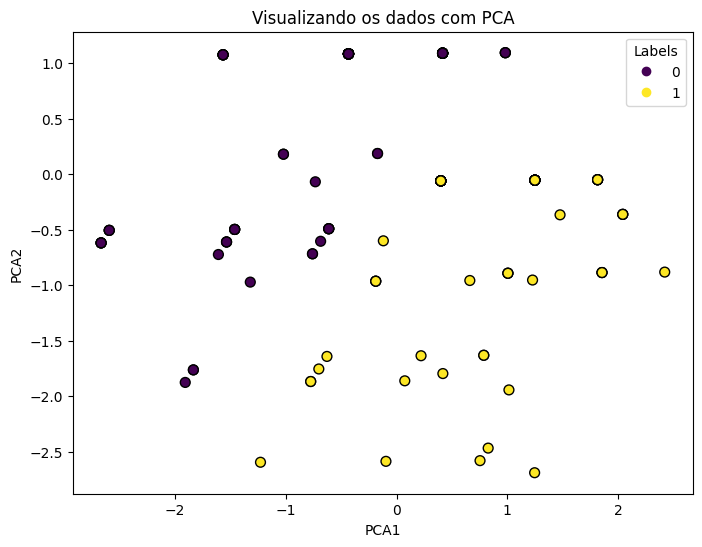

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_2['PCA1'], df_2['PCA2'], c=labels_2, edgecolor='k', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

### Criando a label e colunas

In [197]:
dados_2.head()

,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Cluster
0,"Classes D/E: até R$ 2,9 mil",Fotografia,Raramente (uma vez ao ano),0
1,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Escultura,Ocasionalmente (máximo três vezes ao ano),1
2,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Pintura,Ocasionalmente (máximo três vezes ao ano),1
3,Classe A: superior a R$ 22 mil,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),1
4,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),1


In [198]:
dados_original.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
2,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
3,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,8,2024-08-16 12:20:10,2024-08-16 12:23:20,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


In [199]:
dados_original['Cluster'] = labels_2

In [200]:
mapeamento_usa_app = {0: 'Não', 1: 'Sim'}
dados_original['Assinaria o plano premium?'] = dados_original['Cluster'].map(mapeamento_usa_app)
dados_original.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Assinaria o plano premium?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,0,Não
1,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,1,Sim
2,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1,Sim
3,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1,Sim
4,8,2024-08-16 12:20:10,2024-08-16 12:23:20,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1,Sim


In [201]:
# mapeamento_usa_app = {4: 'Sim', 3: 'Sim', 2: 'Não', 1: 'Não', 0: 'Não'}
# mapeamento_usa_scan = {4: 'Sim', 3: 'Sim', 2: 'Não', 1: 'Não', 0: 'Não'}
# mapeamento_usa_guia = {4: 'Sim', 3: 'Não', 2: 'Não', 1: 'Não', 0: 'Não'}
# dados_original['Usaria o scan?'] = dados_original['Cluster'].map(mapeamento_usa_scan)
# dados_original['Usaria o guia?'] = dados_original['Cluster'].map(mapeamento_usa_guia)
# dados_original['Usaria o aplicativo?'] = dados_original['Cluster'].map(mapeamento_usa_app)
# dados_original.head()

In [202]:
dados_original.to_excel('dados_possiveis_assinantes_c_label_2_clusters.xlsx', index=False)

# Modelo não supervisionado com PCA

In [203]:
dados_3 = dados_original.copy()
dados_3.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome', 'Hora da última modificação'], inplace=True)

In [204]:
df_3 = dados_3.copy()
df_3.fillna("#", inplace=True)
for k, v in mapeamento_2.items():
    df_3[k] = df_3[k].map(v)
display(df_3)
df_3.loc[df_3['Há quanto tempo você se interessa por arte?'] == 'Não me interesso', 'Há quanto tempo você se interessa por arte?'] = '#'
for i in df_3:
    if df_3[i].dtype == object:
        print(i)
        dados_unique = df_3[i].unique()
        dados_unique.sort()
        mapeamento = {}
        for k, v in enumerate(dados_unique):
            mapeamento[v] = k

        df_3[i] = df_3[i].map(mapeamento)

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Assinaria o plano premium?
0,Menos de 18 anos,Masculino,Cursando ensino médio,3,Menos de 2 anos,20,1,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,0,Não
1,Menos de 18 anos,Feminino,Cursando ensino médio,7,De 2 a 4 anos,12,12,Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#,#,1,Sim
2,Menos de 18 anos,Masculino,Cursando ensino médio,10,Estou iniciando agora,20,12,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",#,#,1,Sim
3,Entre 46 e 59 anos,Masculino,Ensino superior concluído,12,Há mais de 10 anos,20,15,Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",#,#,1,Sim
4,Menos de 18 anos,Feminino,Cursando ensino médio,7,De 2 a 4 anos,4,12,Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",#,#,1,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Entre 25 e 35 anos,Masculino,Ensino superior concluído,10,Há mais de 10 anos,20,1,Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,0,Não
155,Entre 46 e 59 anos,Feminino,Ensino superior concluído,12,De 5 a 9 anos,6,12,Não,Sim,Com um guia do próprio museu.,Sim,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Redes sociais,Sim,1,Sim
156,Entre 25 e 35 anos,Feminino,Ensino superior concluído,10,Há mais de 10 anos,5,20,Sim,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Sim,1,Sim
157,Entre 25 e 35 anos,Feminino,Ensino superior concluído,7,Menos de 2 anos,20,12,Não,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",#,#,#,1,Sim


Em qual faixa etária você se encaixa?
Com qual gênero você se identifica?
Qual seu nível de formação atual?
Há quanto tempo você se interessa por arte?
Você já participou de algum curso ou atividade relacionada à arte?
Você segue artístas ou páginas relacionadas à arte nas rede sociais?
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.
Você já usou um aplicativo de um museu ou relacionado à arte?
O que mais te atrai em visitar museus ou exposições de arte?
Você sente falta de mais informações sobre as obras nos museus?
Você procura saber sobre essas informações faltantes?
De que forma você costuma buscar essas informações?
Você encontra o que precisa/esperava ao pesquisar?
Assinaria o plano premium?


In [205]:
df_3

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Assinaria o plano premium?
0,5,1,1,3,4,20,1,0,1,2,0,3,1,2,4,1,0,0
1,5,0,1,7,0,12,12,1,1,2,0,1,0,0,0,0,1,1
2,5,1,1,10,2,20,12,0,1,2,0,3,1,1,0,0,1,1
3,4,1,5,12,3,20,15,1,0,1,1,2,1,1,0,0,1,1
4,5,0,1,7,0,4,12,1,1,2,0,3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2,1,5,10,3,20,1,1,1,2,0,2,1,2,4,2,0,0
155,4,0,5,12,1,6,12,0,1,0,1,1,1,2,6,2,1,1
156,2,0,5,10,3,5,20,1,1,3,0,2,1,2,4,2,1,1
157,2,0,5,7,4,20,12,0,1,3,0,1,0,0,0,0,1,1


In [206]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df_3.columns
x = df_3.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [207]:
principal_components

array([[ 0.72020173, -2.40397705],
       [-2.70806034,  1.88938801],
       [-1.01261882,  1.58212594],
       [-0.36941602,  2.75151201],
       [-1.11218171,  1.33054238],
       [-1.22112435, -0.70846888],
       [-1.28610743, -1.60381291],
       [-3.37089272, -1.22453737],
       [ 0.78993493, -2.89008517],
       [-1.4193283 , -0.90413528],
       [-1.83011741, -1.88140318],
       [ 0.76456403,  1.09108459],
       [-3.45560574, -1.43799263],
       [-0.36913244, -2.01718517],
       [-2.25536082, -0.06241066],
       [ 1.66819768,  1.44610951],
       [-0.99424457,  2.01557355],
       [ 1.06916068, -1.30041117],
       [ 0.86436638, -1.87017107],
       [ 1.39598124,  0.89978095],
       [-3.50235247, -1.27117062],
       [-0.92692653,  2.24696349],
       [ 2.55417462,  1.3038099 ],
       [-3.60159891, -1.3098858 ],
       [-1.29127624,  1.07783027],
       [-1.66294067, -1.18165643],
       [-1.68055531, -1.37437289],
       [ 1.44976405, -2.04432284],
       [ 0.9362728 ,

In [208]:
df_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
df_3 = pd.concat([df_3, df_pca], axis=1)
df_3.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Assinaria o plano premium?,PCA1,PCA2
0,5,1,1,3,4,20,1,0,1,2,0,3,1,2,4,1,0,0,0.720202,-2.403977
1,5,0,1,7,0,12,12,1,1,2,0,1,0,0,0,0,1,1,-2.708060,1.889388
2,5,1,1,10,2,20,12,0,1,2,0,3,1,1,0,0,1,1,-1.012619,1.582126
3,4,1,5,12,3,20,15,1,0,1,1,2,1,1,0,0,1,1,-0.369416,2.751512
4,5,0,1,7,0,4,12,1,1,2,0,3,1,1,0,0,1,1,-1.112182,1.330542


In [209]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 4, random_state=0, n_init="auto")

modelo.fit(df_3[['PCA1', 'PCA2']])

centers = modelo.cluster_centers_  

labels = modelo.labels_

print(labels)

[0 2 2 2 2 3 3 3 0 3 3 1 3 0 3 1 2 0 0 1 3 2 1 3 2 3 3 0 0 3 1 0 3 1 3 1 2
 0 2 3 1 2 1 3 3 0 3 3 0 0 0 2 3 3 2 0 0 2 3 2 1 0 2 0 3 3 0 3 0 2 3 1 1 0
 3 1 3 2 3 0 2 3 2 1 1 2 3 0 1 1 0 2 2 0 0 1 0 0 0 0 2 1 0 3 0 0 0 0 3 3 3
 1 1 2 1 0 1 1 0 3 0 0 1 1 0 2 1 2 1 0 1 3 3 0 0 1 2 3 2 0 2 3 1 3 3 1 3 1
 1 1 2 0 2 0 0 1 1 2 0]


In [210]:
dados_3['Cluster'] = labels
dados_3.head()

,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Cluster,Assinaria o plano premium?
0,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,0,Não
1,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,2,Sim
2,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2,Sim
3,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2,Sim
4,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,2,Sim


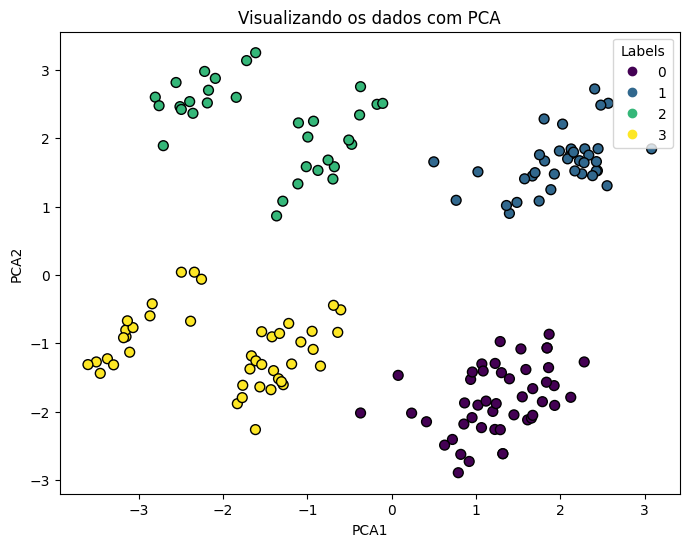

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_3['PCA1'], df_3['PCA2'], c=labels, edgecolor='k', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [212]:
cluster_0_3 = dados_3.loc[dados_3['Cluster'] == 0]
cluster_1_3 = dados_3.loc[dados_3['Cluster'] == 1]
cluster_2_3 = dados_3.loc[dados_3['Cluster'] == 2]
cluster_3_3 = dados_3.loc[dados_3['Cluster'] == 3]

In [213]:
for i in cluster_1_3:
    print(cluster_1_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Entre 25 e 35 anos    12
Menos de 18 anos      10
Entre 46 e 59 anos     6
60+ anos               3
Entre 18 e 24 anos     3
Entre 36 e 45 anos     3
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     26
Masculino    10
Outro         1
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  23
Cursando ensino fundamental                 5
Cursando ensino médio                       5
Ensino superior incompleto/não iniciado     2
Ensino fundamental incompleto               1
Cursando ensino superior                    1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    18
Classe B: entre R$ 7,1 mil e R$ 22 mil     12
Classe A: superior a R$ 22 mil              7
Name: count, dtype: int64
Há quanto tempo você se i

In [214]:
for i in cluster_0_3:
    print(cluster_0_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      27
Entre 25 e 35 anos     8
Entre 36 e 45 anos     4
60+ anos               3
Entre 46 e 59 anos     3
Entre 18 e 24 anos     2
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     27
Masculino    16
Outro         4
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental                15
Ensino superior concluído                  13
Cursando ensino médio                      11
Cursando ensino superior                    3
Ensino fundamental incompleto               2
Ensino superior incompleto/não iniciado     2
Ensino médio incompleto                     1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    18
Classe B: entre R$ 7,1 mil e R$ 22 mil     16
Classes D/E: até R$ 2,9 mil                11
Class

In [215]:
for i in cluster_2_3:
    print(cluster_2_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      17
Entre 46 e 59 anos     6
Entre 25 e 35 anos     4
60+ anos               2
Entre 36 e 45 anos     2
Entre 18 e 24 anos     1
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     18
Masculino    14
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino médio                      15
Ensino superior concluído                  13
Cursando ensino fundamental                 3
Ensino superior incompleto/não iniciado     1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    12
Classe B: entre R$ 7,1 mil e R$ 22 mil     11
Classe A: superior a R$ 22 mil              8
Classes D/E: até R$ 2,9 mil                 1
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       10
Estou iniciando

In [216]:
for i in cluster_3_3:
    print(cluster_3_3[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      25
Entre 18 e 24 anos     7
Entre 46 e 59 anos     4
60+ anos               3
Entre 25 e 35 anos     2
Entre 36 e 45 anos     2
Name: count, dtype: int64
Com qual gênero você se identifica?
Feminino     32
Masculino    11
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino médio                      19
Ensino superior concluído                  10
Cursando ensino fundamental                 8
Ensino superior incompleto/não iniciado     3
Cursando ensino superior                    2
Ensino fundamental incompleto               1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    21
Classe B: entre R$ 7,1 mil e R$ 22 mil     14
Classes D/E: até R$ 2,9 mil                 7
Classe A: superior a R$ 22 mil              1
Name: count, dtype: i